# Iowa State Tax Board

# Problem:
Based on the available data, <i> can we predict the sales revenue generated by alcohol sales for the upcoming year</i>?

In [5]:
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = 10, 10
import seaborn as sns
import numpy as np
import pandas as pd
import sklearn
from sklearn import linear_model
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics
import scipy.stats as scipy

In [6]:
sales_data= pd.read_csv("/Users/cjmdsn/DSI-course-materials/curriculum/04-lessons/week-03/3.4-lab/assets/datasets/sales.csv")
sales_data = sales_data.dropna()
sales_data = sales_data.drop(sales_data.index[[123, 974,120, 962]])
q1_16_sales = sales_data['2016 Sales Q1'].reshape((1174,1))
q1_15_sales = sales_data['2015 Sales Q1'].reshape((1174,1))
total_15_sales = sales_data['2015 Sales'].reshape((1174,1))
sales_data['Q1 Delta'] = sales_data['2016 Sales Q1'] - sales_data['2015 Sales Q1']

Most of the data here isn't useful for our cause. We'll only deal with the total 2015 sales, and the first quarter sales from both 2015 and 2016.

To get a good sense for the data, let's look at the distributions and summary statistics of each variable.

count    1.174000e+03
mean     4.784498e+04
std      8.773595e+04
min      1.058040e+03
25%      8.739815e+03
50%      1.866697e+04
75%      4.819174e+04
max      1.082136e+06
Name: 2015 Sales Q1, dtype: float64


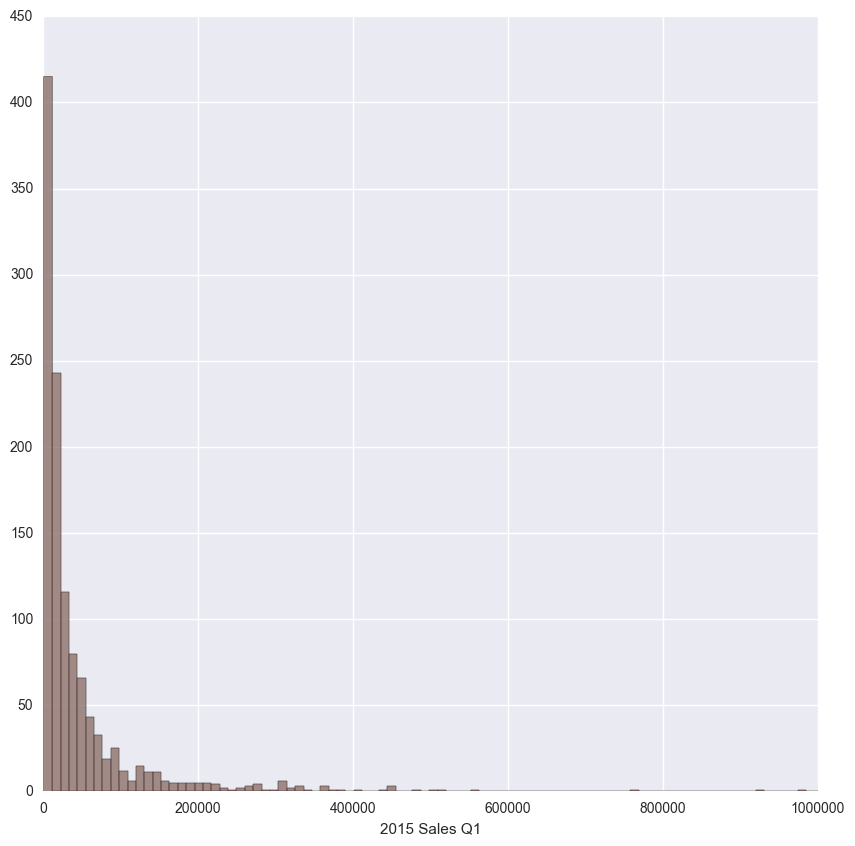

In [9]:
print(sales_data['2015 Sales Q1'].describe())
sns.distplot(sales_data['2015 Sales Q1'], bins=100,kde=False)
sns.plt.xlim(0,1000000)
sns.plt.show()

count    1.174000e+03
mean     4.817272e+04
std      8.657430e+04
min      1.950000e+02
25%      9.043165e+03
50%      1.945250e+04
75%      4.638846e+04
max      1.050712e+06
Name: 2016 Sales Q1, dtype: float64


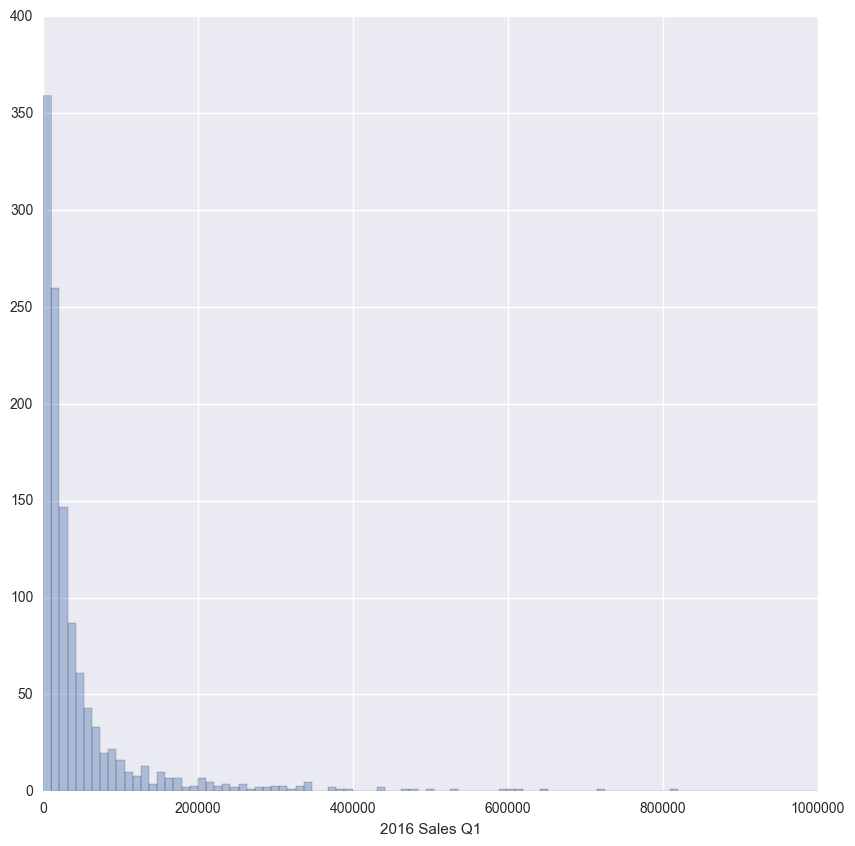

In [10]:
print(sales_data['2016 Sales Q1'].describe())
sns.distplot(sales_data['2016 Sales Q1'], bins=100,kde=False)
sns.plt.xlim(0,1000000)
sns.plt.show()

Those two distributions look remarkably similar. Good news, that means that the 2015 data is likely to be a good estimator of the 2016 data. Let's see just how different the two datasets are:

count      1174.000000
mean        327.738484
std      103477.028320
min     -981370.340000
25%      -13945.657500
50%         445.285000
75%       14579.427500
max      984243.430000
Name: Q1 Delta, dtype: float64


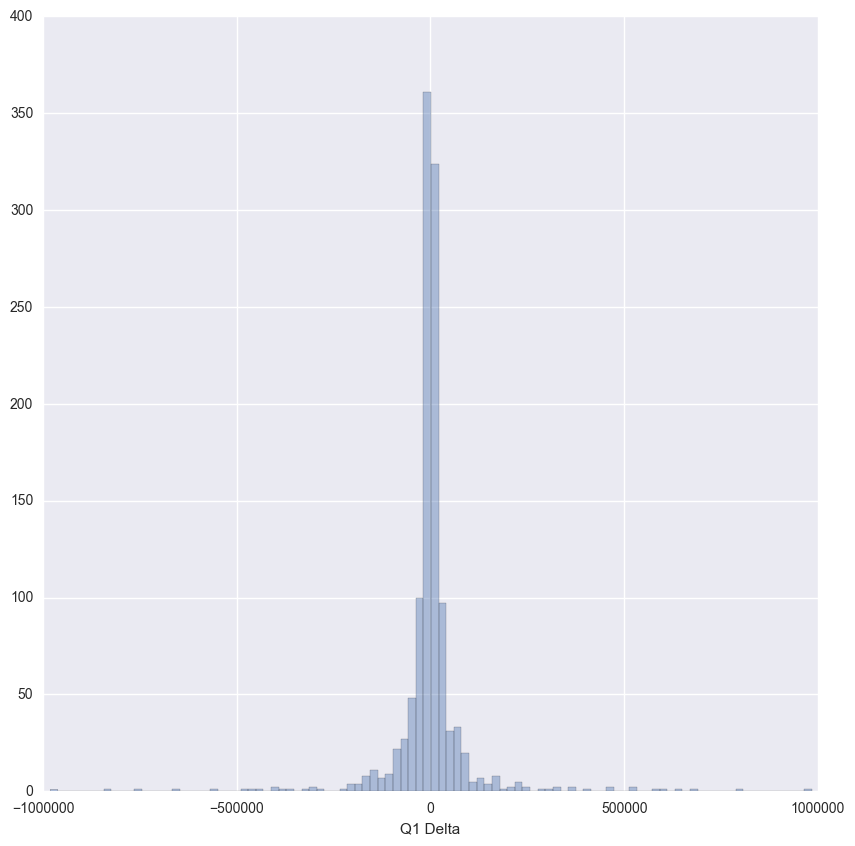

In [11]:
print(sales_data['Q1 Delta'].describe())
sns.distplot(sales_data['Q1 Delta'], bins=100,kde=False)
sns.plt.show()

This looks very Gaussian, except with a very high kurtosis. This implies that the two datasets are actually incredibly similar. For the sake of argument, let's back up this intuition with numbers.

In [14]:
print ("kurtosis:", sales_data["Q1 Delta"].kurtosis())
print(scipy.ttest_rel(sales_data['2015 Sales Q1'],sales_data['2016 Sales Q1']))

('kurtosis:', 31.967378215257011)
Ttest_relResult(statistic=-0.10852193795204911, pvalue=0.91360023941254698)


The kurtosis of the difference is over 30! That tells us that the difference is densely packed around the mean, which is approximately 0. (Kurtosis of a normal distrubtion is usually 3, for context)
For the paired t test, we fail to reject the null hypothesis that the mean of the Q1 2015 sales data is equal to the mean of the Q1 2016 data sales data.
From this we know the two data sets are remarkably similar. It's possible that the difference between them is just random variation.

Just for fun, let's look at the percent change in sales from Q1 2015 to Q1 2016:

In [21]:
delta_percent = sales_data["Q1 Delta"].sum()/sales_data['2015 Sales Q1'].sum()
print(delta_percent)

0.00685000798085


Finally, let's look at total sales in 2015.

count    1.174000e+03
mean     2.146295e+05
std      3.826078e+05
min      7.392300e+03
25%      3.868312e+04
50%      8.105733e+04
75%      2.074776e+05
max      4.155454e+06
Name: 2015 Sales, dtype: float64


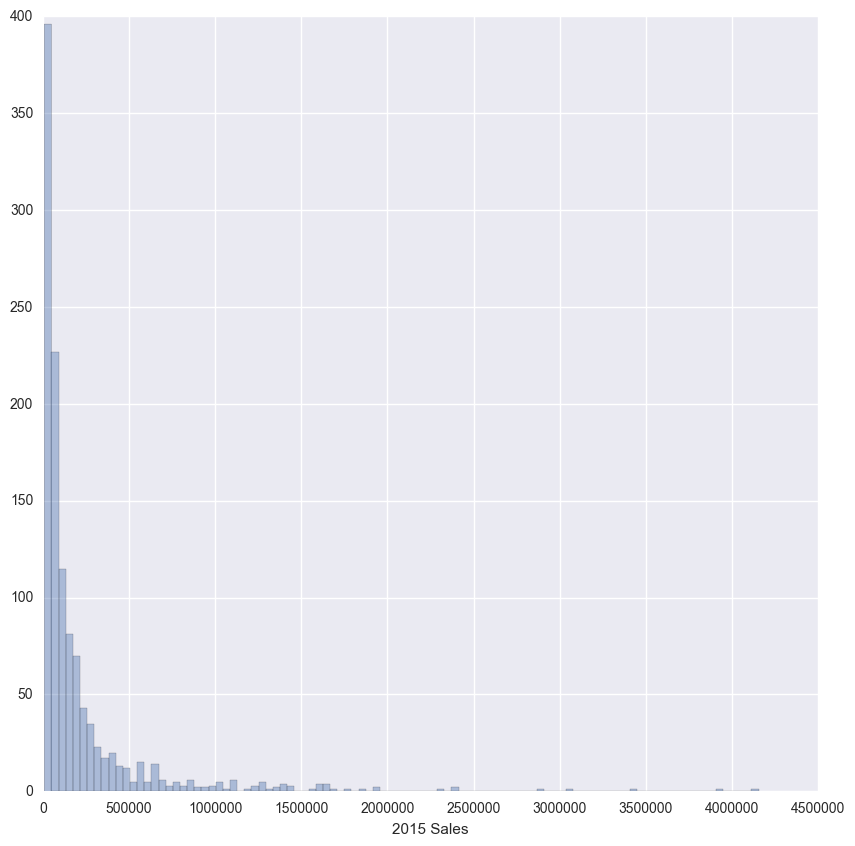

In [15]:
print(sales_data['2015 Sales'].describe())
sns.distplot(sales_data['2015 Sales'], bins=100,kde=False)
sns.plt.show()

I think I'm begining to notice a trend here...

Let's move on to buidling our model. It's a simple, single independent variable linear regression. We should probably practice K-factor cross validation, you know, while we're at it.

r^2: 0.970752008499
Cross-validated scores: [ 0.98569708  0.95223405  0.98509178  0.8661594   0.91559478  0.97860088
  0.94527031  0.93267327  0.94922469  0.84762634  0.97404925  0.95775275
  0.96137049  0.53843837  0.95091873  0.93116222  0.9840884   0.97722376
  0.92913344  0.96086403  0.94215399  0.92843748  0.8328508   0.99716741
  0.85334071  0.99604939  0.9766058   0.97674498  0.95472388  0.97745872
  0.99004176  0.98630185  0.96976234  0.88596571  0.90163337  0.86932204
  0.90242115  0.85855909  0.98027485  0.94069133  0.301542    0.97708626
  0.76013801  0.81519533  0.96310938  0.89100543  0.98096441  0.95971214
  0.490515    0.47969572  0.77866734  0.24797275  0.93023859  0.76584036
  0.82348896  0.89879473  0.87495967  0.8704037   0.99358479 -0.97085345
 -1.39237979  0.60924108  0.86509846  0.94326416  0.71339805  0.98354368
  0.95162043  0.8415829   0.98601529  0.81771821  0.80654473  0.96746573
  0.88501319  0.75917556  0.46593069  0.96766574  0.88510853  0.68046504
  0.124

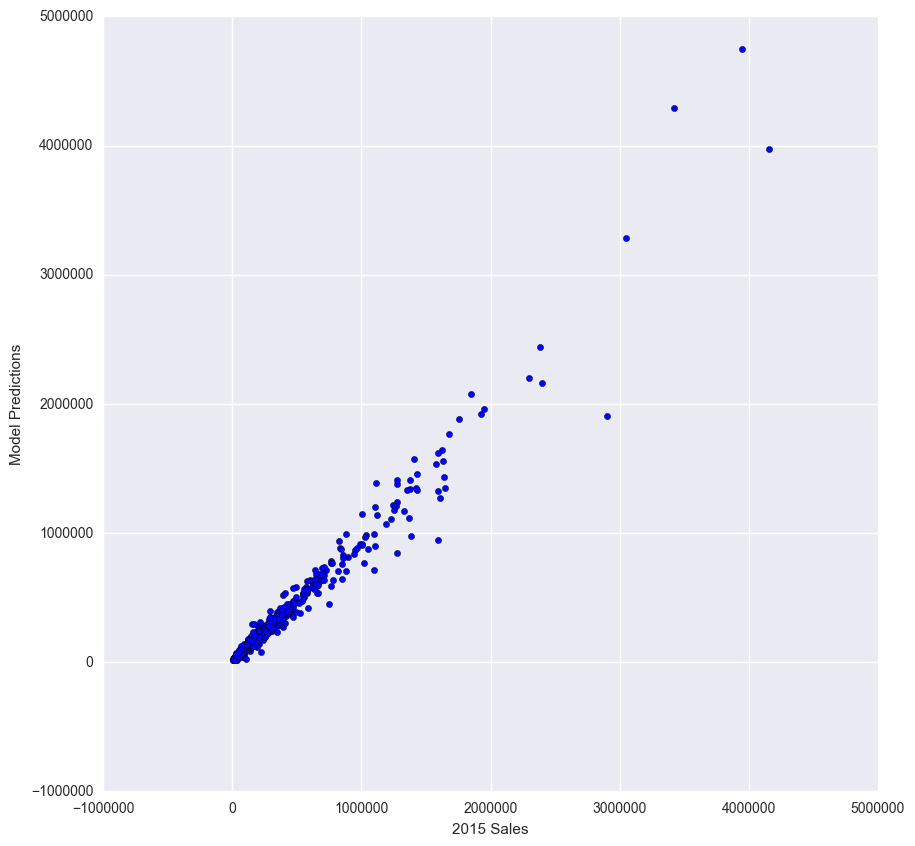

In [18]:
lm = linear_model.LinearRegression()
model = lm.fit(q1_15_sales,total_15_sales)
print "r^2:", model.score(q1_15_sales,total_15_sales)
scores = cross_val_score(model, q1_15_sales,total_15_sales, cv=100)
print "Cross-validated scores:", scores
predictions = cross_val_predict(model, q1_15_sales, total_15_sales, cv=100)
plt.scatter(total_15_sales, predictions)
plt.xlabel("2015 Sales")
plt.ylabel("Model Predictions")
accuracy = metrics.r2_score(total_15_sales, predictions)
print "Cross-Predicted Accuracy:", accuracy
plt.show()

As expected, Q1 2015 Sales do a strong job of predicting the total sales in 2015. The plot of predictions versus the actual values looks linear, so the model is likely to be accurate.

This model is almost painfully simple, so I'm not worried about overfitting, but let's practice doing it anyway.

r^2: 0.970751598729
alpha: 10.0
Cross-validated scores: [ 0.98578524  0.95224768  0.98514366  0.86586877  0.91518406  0.97854539
  0.94515737  0.93317146  0.94922017  0.84721643  0.9738735   0.957733
  0.96130784  0.53980566  0.95075311  0.93110221  0.98394338  0.97721705
  0.92911076  0.96081997  0.94228222  0.92835997  0.83294699  0.99721058
  0.85276091  0.99608632  0.97660747  0.97674572  0.95475376  0.97744188
  0.98998683  0.98627368  0.96974585  0.88585985  0.90161957  0.86920293
  0.90241902  0.85863461  0.980255    0.94066151  0.30272035  0.97707503
  0.76017083  0.81519637  0.96301643  0.89094576  0.98109154  0.95957
  0.49306562  0.48997043  0.77662189  0.22668661  0.93010174  0.76136181
  0.82412652  0.89831518  0.87479097  0.86621857  0.99364183 -0.9455473
 -1.39742211  0.59979424  0.86506042  0.94339041  0.7139431   0.9835442
  0.95125479  0.84158952  0.98588608  0.81756786  0.80638082  0.96740784
  0.88302457  0.76283066  0.4638323   0.96835787  0.88502808  0.67396706
  

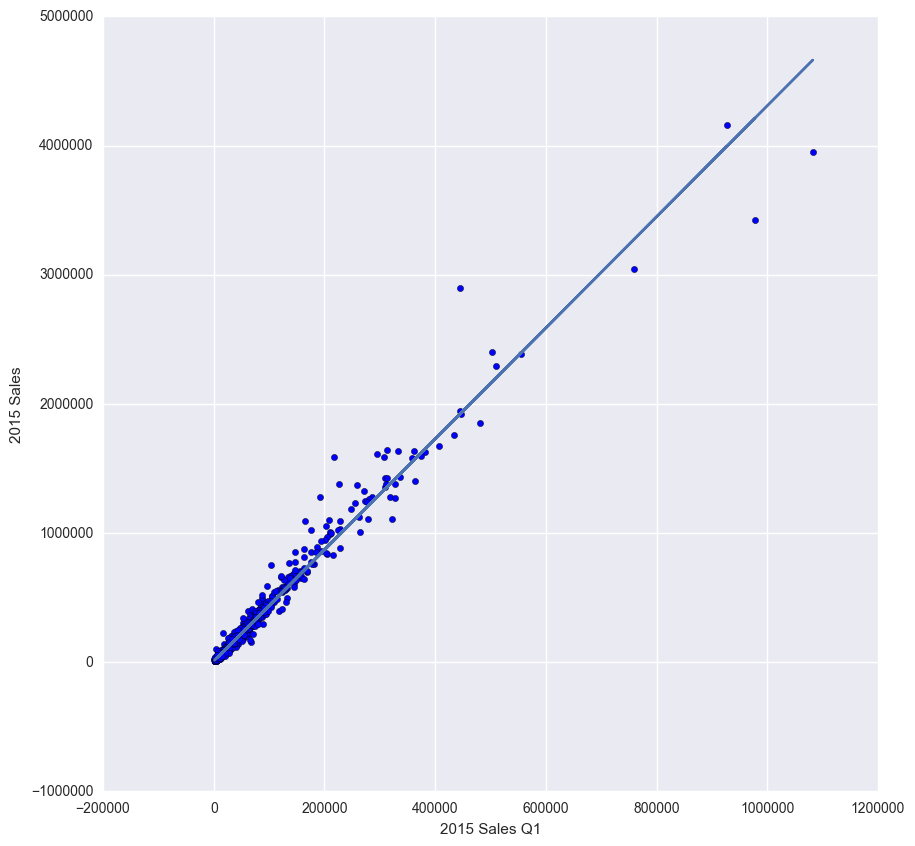

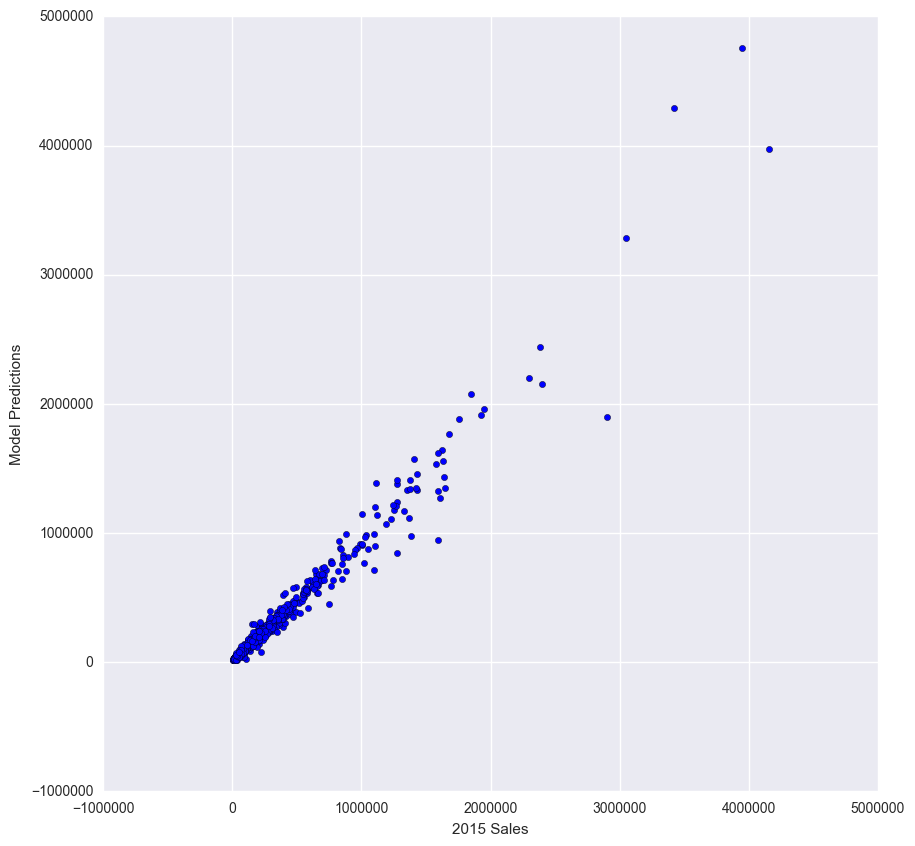

In [19]:
rlmcv = linear_model.RidgeCV(normalize=False)
ridge_model = rlmcv.fit(q1_15_sales, total_15_sales)
predictions = ridge_model.predict(q1_15_sales)
plt.scatter(q1_15_sales, total_15_sales)
plt.plot(q1_15_sales, predictions)
plt.xlabel("2015 Sales Q1")
plt.ylabel("2015 Sales")
print "r^2:", ridge_model.score(q1_15_sales,total_15_sales)
print "alpha:", rlmcv.alpha_
scores = cross_val_score(ridge_model, q1_15_sales,total_15_sales, cv=100)
print "Cross-validated scores:", scores
predictions = cross_val_predict(ridge_model, q1_15_sales, total_15_sales, cv=100)
accuracy = metrics.r2_score(total_15_sales, predictions)
print "Cross-Predicted Accuracy:", accuracy
plt.show()
plt.scatter(total_15_sales, predictions)
plt.xlabel("2015 Sales")
plt.ylabel("Model Predictions")
plt.show()

The two outcomes are functionally identical! If we didn't already, now it's fairly safe to say the model isn't overfitting. But what if we regularized with a different norm? Let's see what Lasso has in store for us:

r^2: 0.970752008499
Cross-validated scores: [ 0.98569708  0.95223405  0.98509178  0.8661594   0.91559478  0.97860088
  0.94527031  0.93267327  0.94922469  0.84762634  0.97404925  0.95775275
  0.96137049  0.53843837  0.95091873  0.93116222  0.9840884   0.97722376
  0.92913344  0.96086403  0.94215399  0.92843748  0.8328508   0.99716741
  0.85334071  0.99604939  0.9766058   0.97674498  0.95472388  0.97745872
  0.99004176  0.98630185  0.96976234  0.88596571  0.90163337  0.86932204
  0.90242115  0.85855909  0.98027485  0.94069133  0.301542    0.97708626
  0.76013801  0.81519533  0.96310938  0.89100543  0.98096441  0.95971214
  0.490515    0.47969572  0.77866734  0.24797275  0.93023859  0.76584036
  0.82348896  0.89879473  0.87495967  0.8704037   0.99358479 -0.97085346
 -1.39237979  0.60924108  0.86509846  0.94326416  0.71339805  0.98354368
  0.95162043  0.8415829   0.98601529  0.81771821  0.80654473  0.96746573
  0.88501319  0.75917556  0.46593069  0.96766574  0.88510853  0.68046504
  0.124

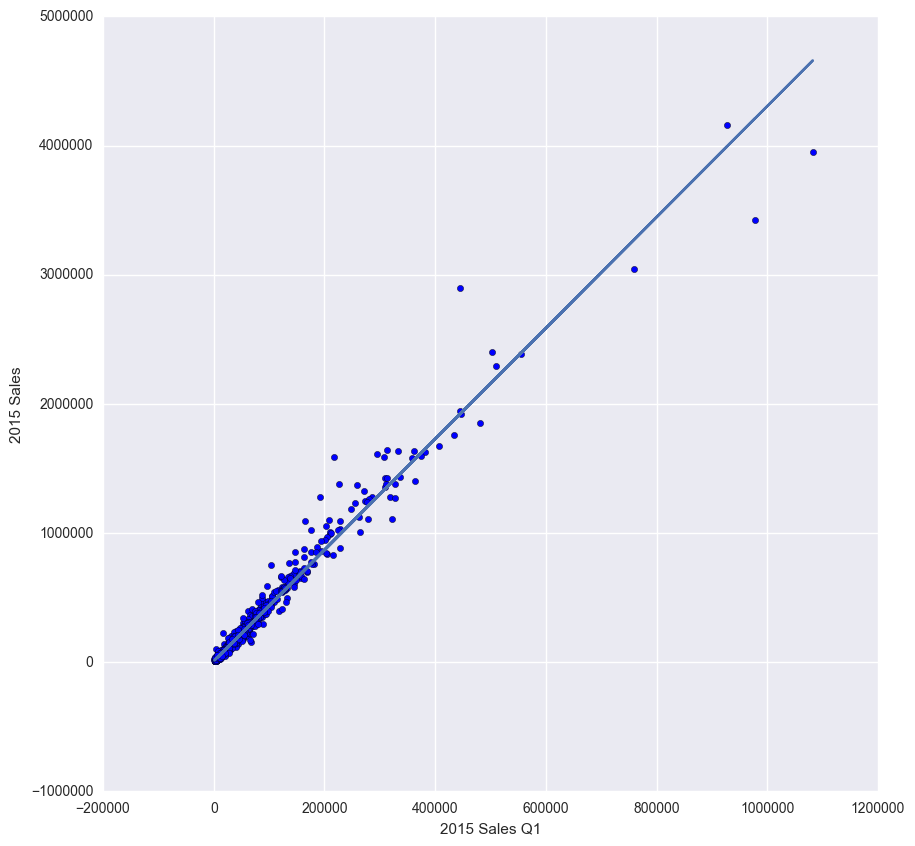

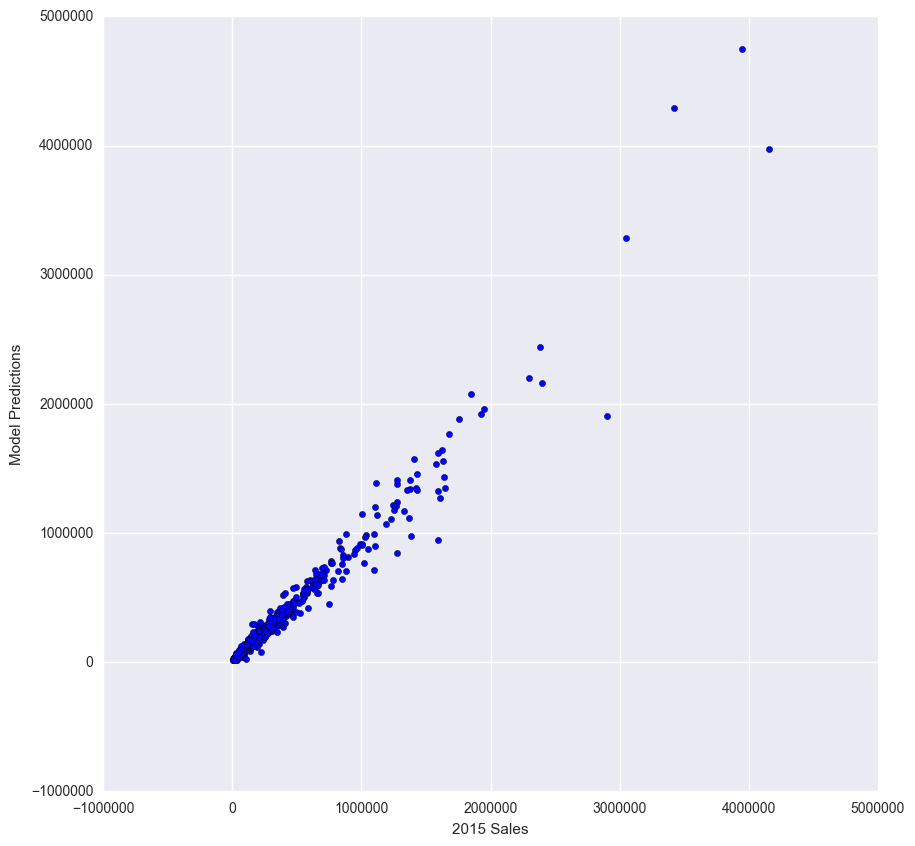

In [20]:
lr = linear_model.Lasso(normalize=False)
lasso_model = lr.fit(q1_15_sales, total_15_sales)
predictions = lasso_model.predict(q1_15_sales)
plt.scatter(q1_15_sales, total_15_sales)
plt.plot(q1_15_sales, predictions)
plt.xlabel("2015 Sales Q1")
plt.ylabel("2015 Sales")
print "r^2:", lasso_model.score(q1_15_sales,total_15_sales)
scores = cross_val_score(lasso_model, q1_15_sales,total_15_sales, cv=100)
print "Cross-validated scores:", scores
predictions = cross_val_predict(lasso_model, q1_15_sales, total_15_sales, cv=100)
accuracy = metrics.r2_score(total_15_sales, predictions)
print "Cross-Predicted Accuracy:", accuracy
plt.show()
plt.scatter(total_15_sales, predictions)
plt.xlabel("2015 Sales")
plt.ylabel("Model Predictions")
plt.show()

Turns out this model is so simplistic, the Lasso regularization is the same as Ridge. Now that we're pretty sure the model is correctly fit, let's make our predictions about how sales revenue in 2016.

In [22]:
sales_predictions = lm.predict(q1_16_sales)
sales_data["2016 Sales Projections"] = sales_predictions

Let's see the total sales revenue prediction, and how different it is from 2015:

In [23]:
print("Total Sales Revenue:",sales_data["2016 Sales Projections"].sum())
print("Percent Change from 2015:",(sales_data["2016 Sales Projections"].sum()-sales_data['2015 Sales'].sum())/sales_data['2015 Sales'].sum())

('Total Sales Revenue:', 253628289.172128)
('Percent Change from 2015:', 0.006560974824961772)


Where have we seen a .66% year over year increase before? Oh right, that's the same as the change between Q1 sales.

# Question Answered

Now time for some analysis:

# Takeaways

So there's good news and bad news here:

Good News: We predict there will be $253 Million of alcohol sales we can tax.

Bad News: We only expect sales to rise by roughly half a percent from last year. 

If this is less than the inflation rate, we may need to raise taxes in order to maintain the current funding level of government programs.
Fortunately, the demand for alcohol is relatively inelastic, so we can be pretty sure that a modest tax increase won't have much of an impact on consumption.